In [1]:
import eleanor
import lightkurve as lk 
from IPython.display import clear_output
import pandas as pd
import numpy as np
import pickle
from os import listdir
import warnings

In [2]:
warnings.filterwarnings('ignore')
file_list = []
for files in listdir('/mnt/data/quasar_database/lightcurves'):
    file_list.append(int(files[:-9]))
total_targets = range(0,len(pd.read_csv('final_quasar_catalogue.csv', sep=',', header=0, usecols=['RA'],squeeze=True)))
target_list = [x for x in total_targets if x not in file_list]
print(target_list[:30])
print(len(target_list)/len(total_targets))

[195, 627, 981, 1472, 2910, 3613, 3643, 3670, 3716, 3763, 3802, 3855, 3875, 3949, 4146, 4157, 4215, 4241, 4482, 4518, 4609, 4648, 4768, 4887, 5332, 5362, 5391, 5431, 5556, 5561]
0.49782361847085543


In [ ]:
ral = pd.read_csv('final_quasar_catalogue.csv', sep=',', header=0, usecols=['RA'],squeeze=True)
decl = pd.read_csv('final_quasar_catalogue.csv', sep=',', header=0, usecols=['DEC'],squeeze=True)
terrible_targets = []

for row in target_list[10:]:
    try:
        ra = ral[row]
        dec = decl[row]

        star = eleanor.multi_sectors(sectors='all',tic=0,coords=(ra,dec),tc=True)

        full_lc = lk.LightCurve([],[])
        for observation in star:
            data = eleanor.TargetData(observation,bkg_size=15,do_pca=False)
            data.custom_aperture(shape='rectangle', h=1,w=1, method='exact')
            data.get_lightcurve()

            q = data.quality == 0

            lc = data.to_lightkurve()#flux=data.pca_flux)
            lc.flux = lc.flux - np.median(lc.flux)
            full_lc = full_lc.append(lc)

            with open('/mnt/data/quasar_database/sector_lightcurves/' + str(row) + '-' + str(observation.sector) + 'lc.pickle','wb') as wfile:
                pickle.dump(lc,wfile)
        with open('/mnt/data/quasar_database/lightcurves/' + str(row) + 'lc.pickle','wb') as wfile:
            pickle.dump(full_lc,wfile)
        clear_output()
        print("Done")
    except:
        terrible_targets.append(row)
        clear_output()
        print("Error")
        continue

Done
Found star in Sector(s) 14 15 21
Inflating...
Inflating...
Inflating...


In [12]:
from tess_stars2px import tess_stars2px_function_entry as tess_stars2px
result = tess_stars2px(8675309, ra, dec)
sector = result[3][result[3] < 21.5]
sectors = sector.tolist()
len(sectors)

0

In [8]:
ral = pd.read_csv('final_quasar_catalogue.csv', sep=',', header=0, usecols=['RA'],squeeze=True)
decl = pd.read_csv('final_quasar_catalogue.csv', sep=',', header=0, usecols=['DEC'],squeeze=True)
terrible_targets = []

row = 5561
ra = ral[row]
dec = decl[row]

star = eleanor.multi_sectors(sectors='all',tic=0,coords=(ra,dec),tc=True)

full_lc = lk.LightCurve([],[])
for observation in star:
    data = eleanor.TargetData(observation,bkg_size=15,do_pca=False)
    data.custom_aperture(shape='rectangle', h=1,w=1, method='exact')
    data.get_lightcurve()

    q = data.quality == 0

    lc = data.to_lightkurve()#flux=data.pca_flux)
    lc.flux = lc.flux - np.median(lc.flux)
    full_lc = full_lc.append(lc)

    with open('/mnt/data/quasar_database/sector_lightcurves/' + str(row) + '-' + str(observation.sector) + 'lc.pickle','wb') as wfile:
        pickle.dump(lc,wfile)
with open('/mnt/data/quasar_database/lightcurves/' + str(row) + 'lc.pickle','wb') as wfile:
    pickle.dump(full_lc,wfile)
clear_output()
print("Done")

Found star in Sector(s) 21
Inflating...


ValueError: cannot reshape array of size 0 into shape (0,newaxis)

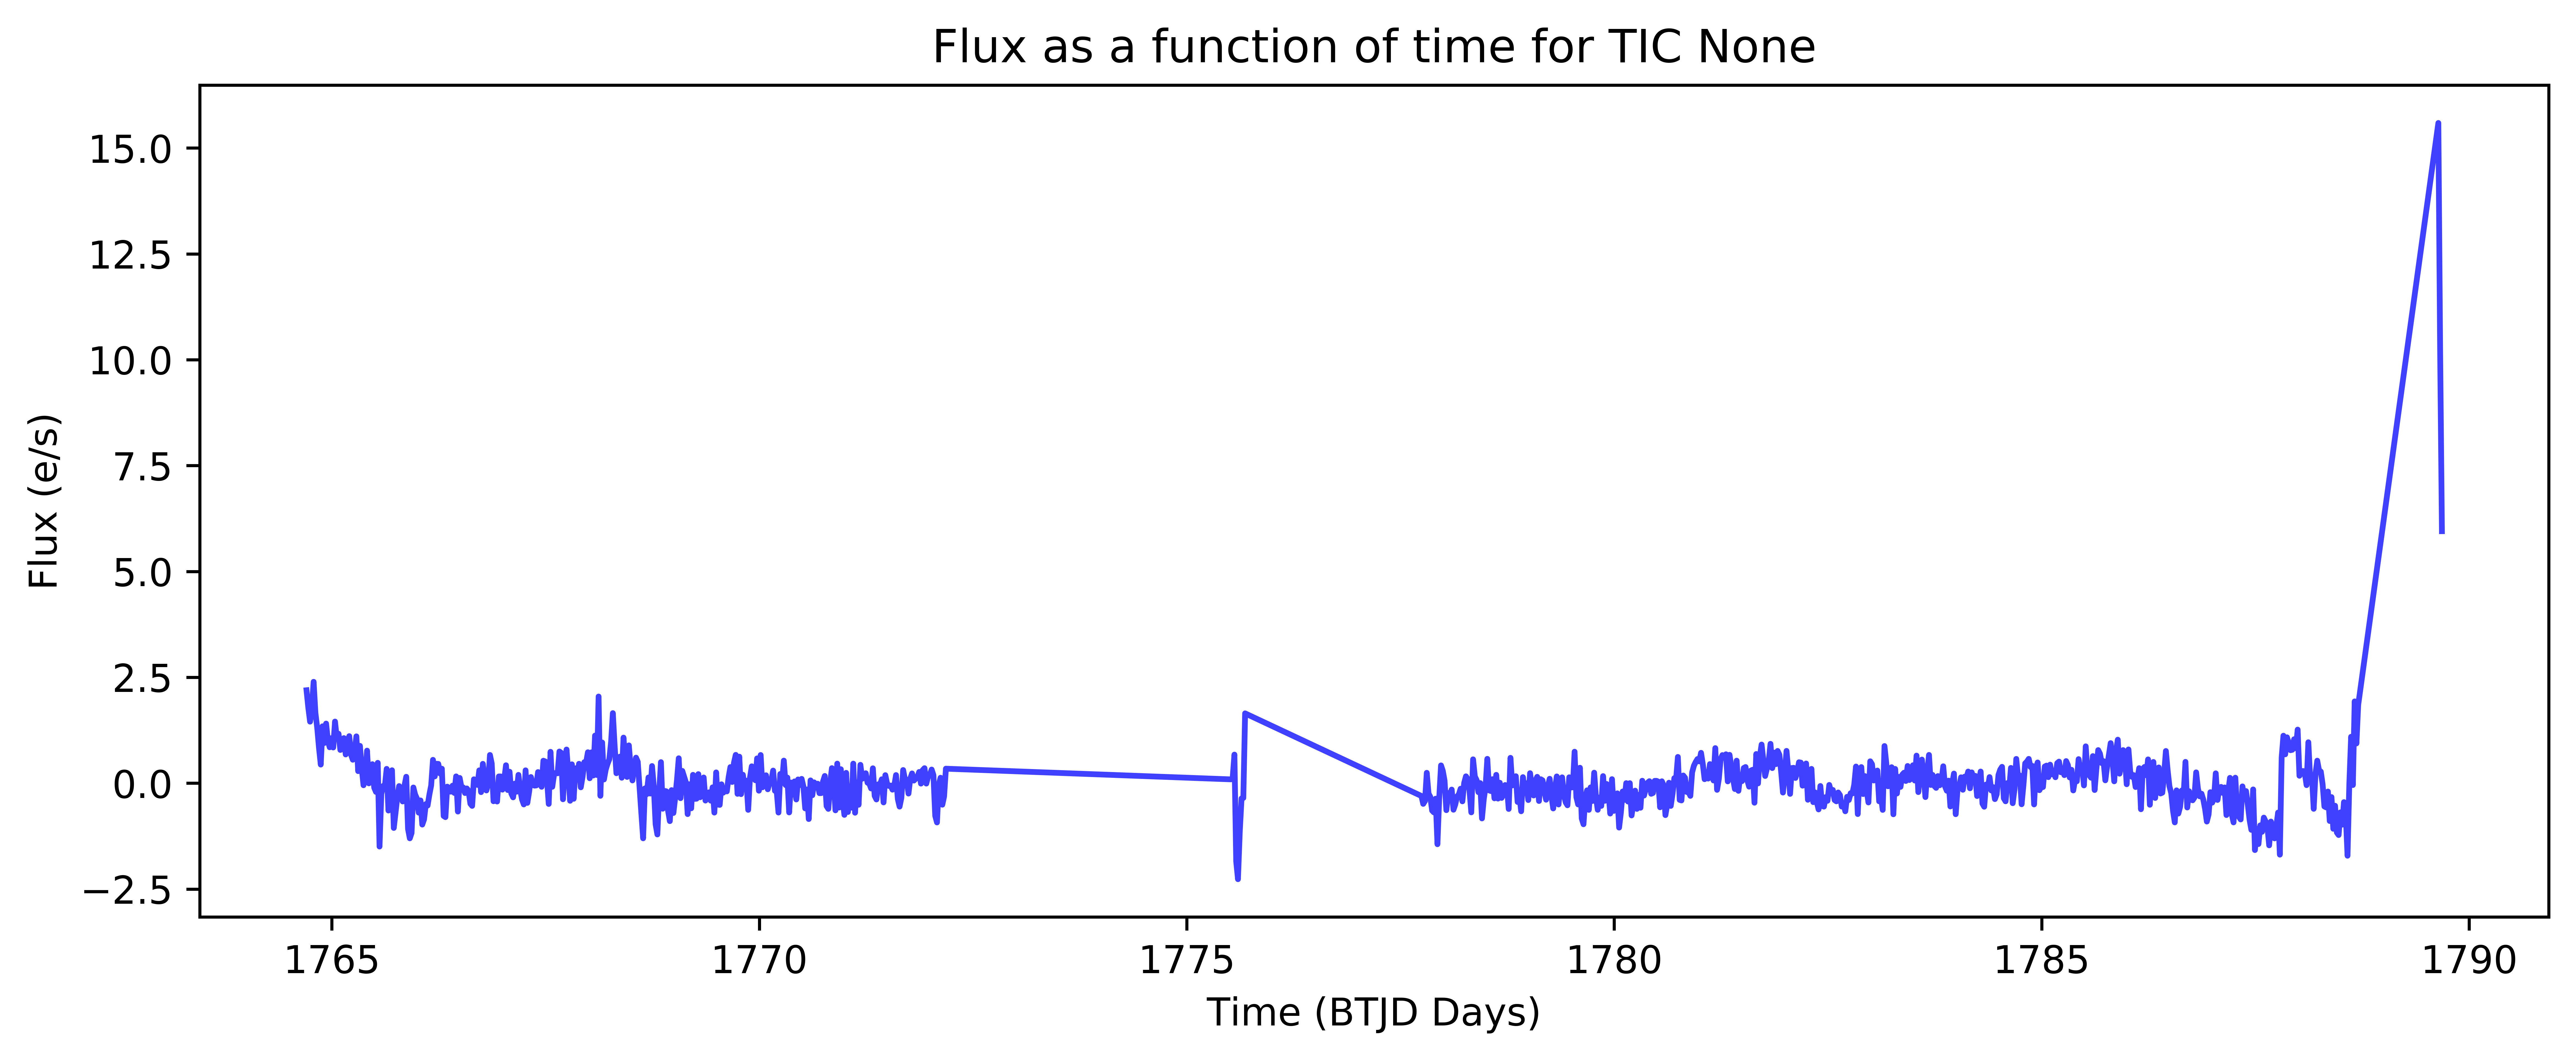

In [9]:
import lightkurve as lk
import pickle
import matplotlib.pyplot as plt
import numpy as np
from tkinter import Tk, Label, Entry, Button
from tkinter.ttk import Combobox

def load(file='1lc.pickle',width=18,height=3,dpi=1000,alpha=0.75,bin=True,bins=2000,sigma=20,save=False):
    plt.figure(figsize=(width, height), dpi=dpi)
    with open(file,'rb') as rfile:
        lc = pickle.load(rfile)
    lc.quality = np.zeros(len(lc.flux),dtype='int')
    if bin == True:
        lc = lc.remove_nans().remove_outliers(sigma=sigma).bin(bins=bins)
    elif bin == False:
        lc = lc.remove_nans().remove_outliers(sigma=sigma)
    plt.plot(lc.time,lc.flux,color='blue',alpha=alpha,label='TIC ' + str(lc.targetid))
    #plt.xlim(left=1340,right=1380)
    #plt.ylim(-5,5)
    plt.xlabel("Time (BTJD Days)")
    plt.ylabel("Flux (e/s)")
    plt.title("Flux as a function of time for " + 'TIC ' + str(lc.targetid))
    if save == True:
        plt.savefig(str(file) + ".png")
   
def load2(file='1lc.pickle',file2='2lc.pickle',width=18,height=3,dpi=1000,alpha=0.75,bin=True,save=False):
    plt.figure(figsize=(width, height), dpi=dpi)
    with open(file,'rb') as rfile:
        lc = pickle.load(rfile)
    if bin == True:
        lc = lc.remove_nans().remove_outliers().bin()
    elif bin == False:
        lc = lc.remove_nans().remove_outliers()
    plt.plot(lc.time,lc.flux,color='red',alpha=alpha,label='TIC ' + str(lc.targetid))
    
    with open(file2,'rb') as rfile:
        lc1 = pickle.load(rfile)
    if bin == True:
        lc1 = lc1.remove_nans().remove_outliers().bin()
    elif bin == False:
        lc1 = lc1.remove_nans().remove_outliers(sigma=20)
    plt.plot(lc1.time,lc1.flux,color='blue',alpha=alpha,label='TIC ' + str(lc1.targetid))
    plt.xlabel("Time (BTJD Days)")
    plt.ylabel("Flux (e/s)")
    plt.title("Flux as a function of time for " + 'TIC ' + str(lc.targetid) + " (red) and " + 'TIC ' + str(lc1.targetid) + " (blue)")
    if save == True:
        plt.savefig(str(file)+".png")

load('F:/quasar_database/lightcurves/0lc.pickle',bin=False,width=11,height=4,sigma=20)